#Nome: Rafael Ramos Batista Corcino#

login: rrbc

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import scipy
from skimage.data import *

#Avaliação de duas imagens borradas


Como forma de avaliação, irei utilizar o algoritmo de avaliação automática $\textit{no reference}$ de imagens, o BRISQUE. Lembrando que quanto menor o $\textit{score}$, maior a qualidade da imagem para o BRISQUE.

In [ ]:
pip install brisque

In [ ]:
from brisque import BRISQUE

In [ ]:
def comparar_imagens_brisque(caminho_img1, caminho_img2):
    # Carrega as imagens
    img1 = cv2.imread(caminho_img1)
    img2 = cv2.imread(caminho_img2)

    # Converte as imagens para RGB
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Inicializa o avaliador BRISQUE
    avaliador = BRISQUE(url=False)

    # Calcula os scores
    score1 = avaliador.score(img=img1)
    score2 = avaliador.score(img=img2)

    # Determina qual imagem é melhor
    if score1 < score2:
        melhor = "Imagem 1"
    elif score2 < score1:
        melhor = "Imagem 2"
    else:
        melhor = "Ambas têm qualidade igual"

    return img1, img2, score1, score2, melhor

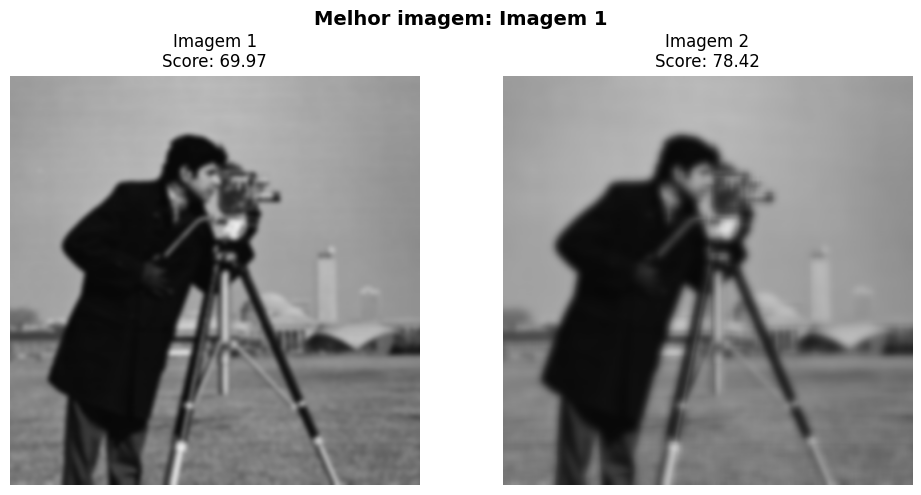

In [ ]:
caminho_img1 = "/content/imagens/Q4/cameraman_blur1.png"
caminho_img2 = "/content/imagens/Q4/cameraman_blur2.png"
img1, img2, sr1, sr2, melhor_imagem = comparar_imagens_brisque(caminho_img1, caminho_img2)

# Exibe as imagens com os scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(f"Imagem 1\nScore: {sr1:.2f}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title(f"Imagem 2\nScore: {sr2:.2f}")
plt.axis("off")

plt.suptitle(f"Melhor imagem: {melhor_imagem}", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#Aplicação de um filtro de média em uma imagem

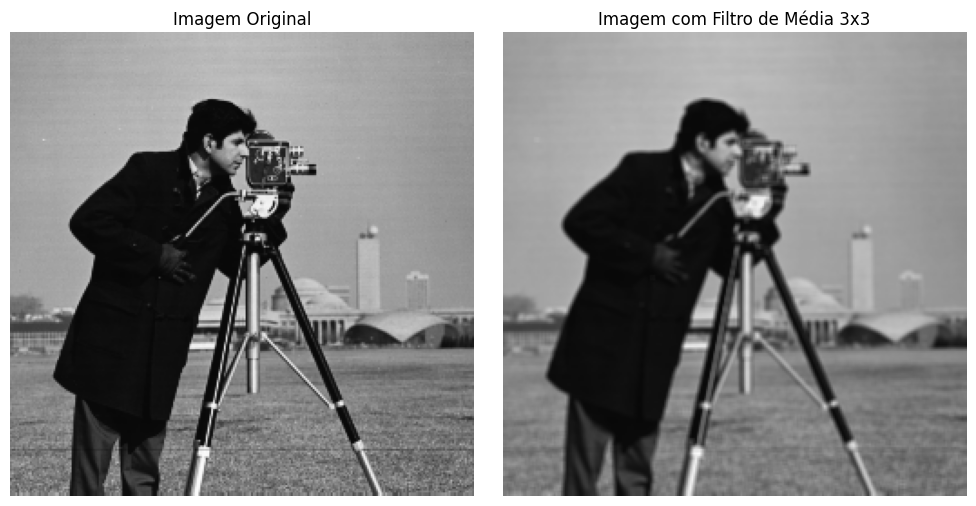

In [ ]:
# Carrega a imagem
img_path = "/content/imagens/Q5/cameraman.bmp"
img = cv2.imread(img_path)

# Converte a imagem para RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Aplicando o filtro de média 3x3
img_blur = cv2.blur(img,(3,3))

# Plotando as duas imagens
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_blur)
plt.title("Imagem com Filtro de Média 3x3")
plt.axis("off")

plt.tight_layout()
plt.show()

#Aplicação sequencial de um filtro linha e um filtro coluna na mesma imagem anterior

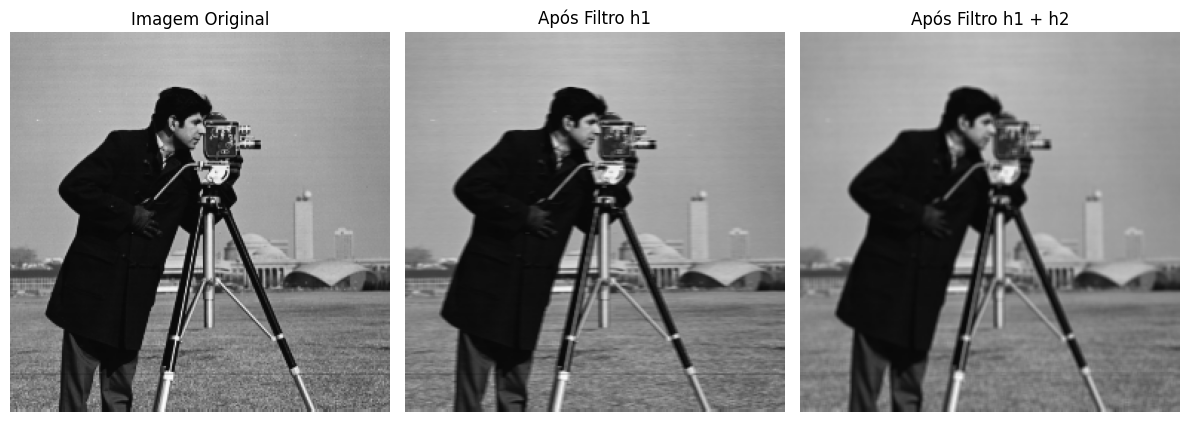

In [ ]:
# Definindo os filtros
h1 = np.array([[1, 1, 1]], dtype=np.float32) / 3  # filtro linha
h2 = np.array([[1], [1], [1]], dtype=np.float32) / 3  # filtro coluna

# Aplica o filtro linha
img_h1 = cv2.filter2D(img, -1, h1)

# Aplica o filtro coluna sobre o resultado anterior
img_h1_h2 = cv2.filter2D(img_h1, -1, h2)

# Mostra a imagem original e o resultado da filtragem separável
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_h1)
plt.title("Após Filtro h1")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_h1_h2)
plt.title("Após Filtro h1 + h2")
plt.axis("off")

plt.tight_layout()
plt.show()

A imagem também fica embaçada, semelhante quando se aplica o filtro de média diretamente.

In [ ]:
def comparar_imagens_brisque2(img1, img2):

    # Inicializa o avaliador BRISQUE
    avaliador = BRISQUE(url=False)

    # Calcula os scores
    score1 = avaliador.score(img=img1)
    score2 = avaliador.score(img=img2)

    # Determina qual imagem é melhor
    if score1 < score2:
        melhor = "Imagem 1"
    elif score2 < score1:
        melhor = "Imagem 2"
    else:
        melhor = "Ambas têm qualidade igual"

    return score1, score2, melhor

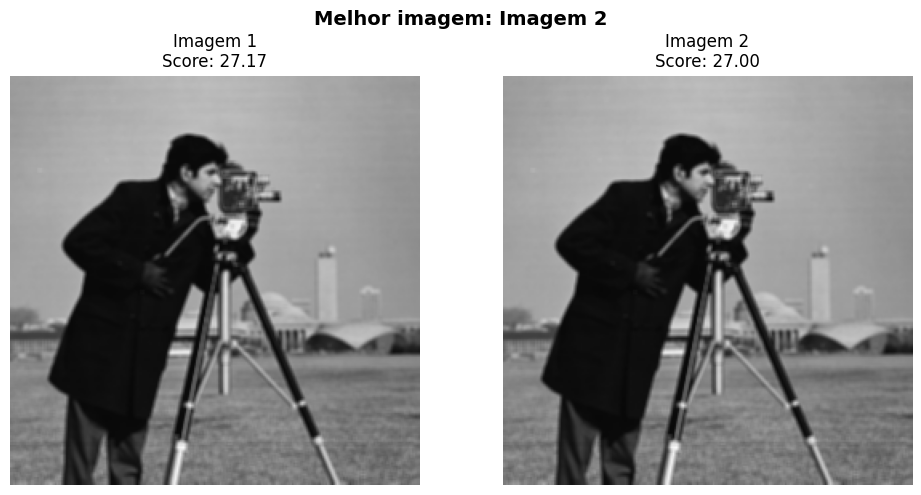

In [ ]:
sr1, sr2, melhor_imagem = comparar_imagens_brisque2(img_blur, img_h1_h2)

# Exibe as imagens com os scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_blur)
plt.title(f"Imagem 1\nScore: {sr1:.2f}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_h1_h2)
plt.title(f"Imagem 2\nScore: {sr2:.2f}")
plt.axis("off")

plt.suptitle(f"Melhor imagem: {melhor_imagem}", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Como podemos observar, ao avaliar com o BRISQUE, algoritmo de avaliação automática $\textit{no reference}$ de imagens, é possível notar que as duas imagens resultantes, tanto com aplicação direta do filtro de média quanto com a aplicação sequencial do filtro de linha e do filtro de coluna, são tão semelhantes que recebem $\textit{scores}$ bem próximos, permitindo concluir que ambas as formas de filtrar a imagem geram praticamente o mesmo resultado.

A convolução dos filtros h1 e h2 dará no filtro de média, como é possível observar nos cálculos abaixo, e, consequentemente, a aplicação desse filtro na imagem gerará o mesmo resultado quando se aplica o filtro de média diretamente.

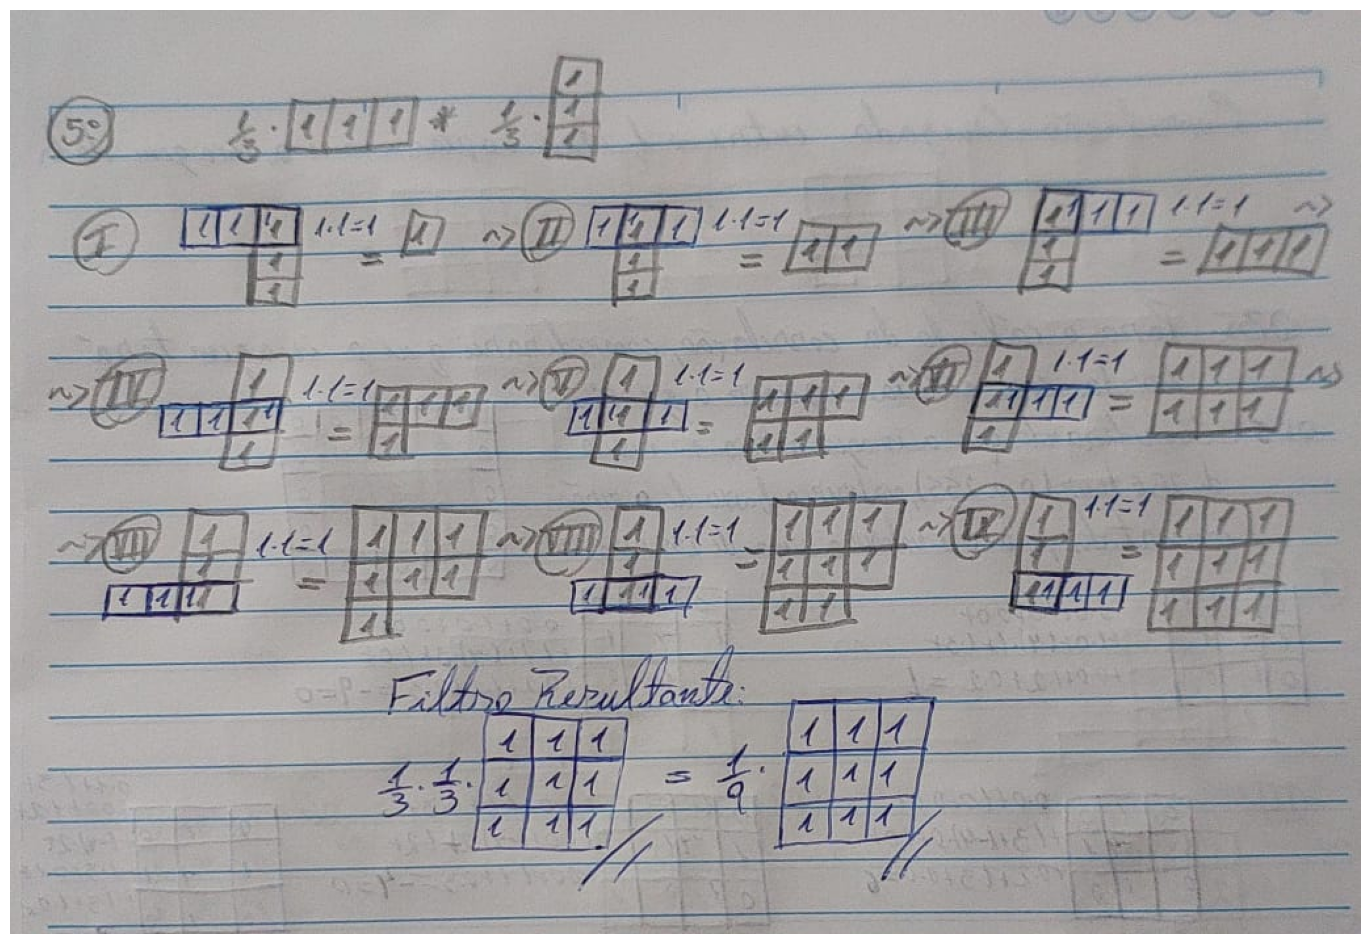

In [ ]:
img1 = cv2.imread("/content/imagens/caderno/PDI_Q5.jpg")


# Converte de BGR para RGB (cv2 carrega em BGR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(18, 12))

# Mostra a imagem
plt.imshow(img1)
plt.axis("off")
plt.show()

#Detecção de cores

Para realizar a detecção da cor na imagem, converterei a imagem para o modelo de cor HSV, pois esse modelo separa a matiz da iluminação e saturação, tornando mais fácil identificar cores, mesmo com variações de luz ou sombra, diferentemente do modelo RGB, em que a cor está misturada com o brilho.

In [ ]:
def tem_mm_azul(imagem_path, mostrar=False):
    # Carrega imagem e converte para HSV
    img = cv2.imread(imagem_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define faixa da cor azul em HSV
    azul_baixo = np.array([100, 100, 50])
    azul_alto = np.array([140, 255, 255])

    # Cria máscara para detectar apenas tons de azul
    mascara_azul = cv2.inRange(img_hsv, azul_baixo, azul_alto)

    # Verifica se existe algum pixel azul na imagem
    tem_azul = np.any(mascara_azul > 0)

    # Mostra a máscara, se quiser visualizar
    if mostrar:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img_rgb)
        plt.title("Imagem Original")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mascara_azul, cmap='gray')
        plt.title("Regiões Azuis Detectadas")
        plt.axis("off")
        plt.show()

    return tem_azul


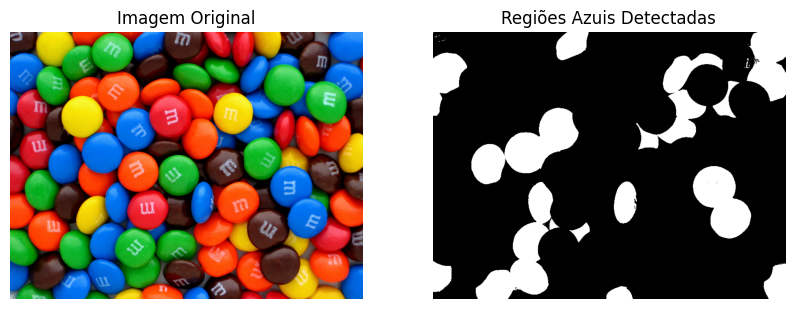

Sim! Tem M&M azul na imagem


In [ ]:
caminho_img = "/content/imagens/Q6/MM.bmp"
if tem_mm_azul(caminho_img, mostrar=True):
    print("Sim! Tem M&M azul na imagem")
else:
    print("Não encontrei M&M azul nessa imagem")

Caso utilizasse o modelo RGB para detectar essas cores, enfrentaria dificuldades, justamente pelo modelo misturar cor e luz e ser muito afetado por sombra e brilho, resultando numa dificuldade para definir faixas de cores para cores como o vermelho e o laranja. Com o modelo HSV não enfrento tanto essas dificuldades de definir faixas de cores, pois o modelo separa cor e luz e há alta tolerância a iluminação.

In [ ]:
def tem_vermelho_e_laranja(img_path, mostrar=False):
    # Carrega e converte para HSV
    img = cv2.imread(img_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Faixa para vermelho (dividido em dois intervalos por causa do círculo HSV)
    vermelho_baixo1 = np.array([0, 100, 50])
    vermelho_alto1 = np.array([10, 255, 255])
    vermelho_baixo2 = np.array([160, 100, 50])
    vermelho_alto2 = np.array([180, 255, 255])

    # Faixa para laranja
    laranja_baixo = np.array([11, 100, 50])
    laranja_alto = np.array([25, 255, 255])

    # Máscaras
    mascara_vermelho1 = cv2.inRange(img_hsv, vermelho_baixo1, vermelho_alto1)
    mascara_vermelho2 = cv2.inRange(img_hsv, vermelho_baixo2, vermelho_alto2)
    mascara_vermelho = cv2.bitwise_or(mascara_vermelho1, mascara_vermelho2)

    mascara_laranja = cv2.inRange(img_hsv, laranja_baixo, laranja_alto)

    # Verifica se ambas as cores estão presentes
    tem_vermelho = np.any(mascara_vermelho > 0)
    tem_laranja = np.any(mascara_laranja > 0)

    if mostrar:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Imagem Original")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(mascara_vermelho, cmap='gray')
        plt.title("Vermelho Detectado")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(mascara_laranja, cmap='gray')
        plt.title("Laranja Detectado")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        return tem_vermelho, tem_laranja



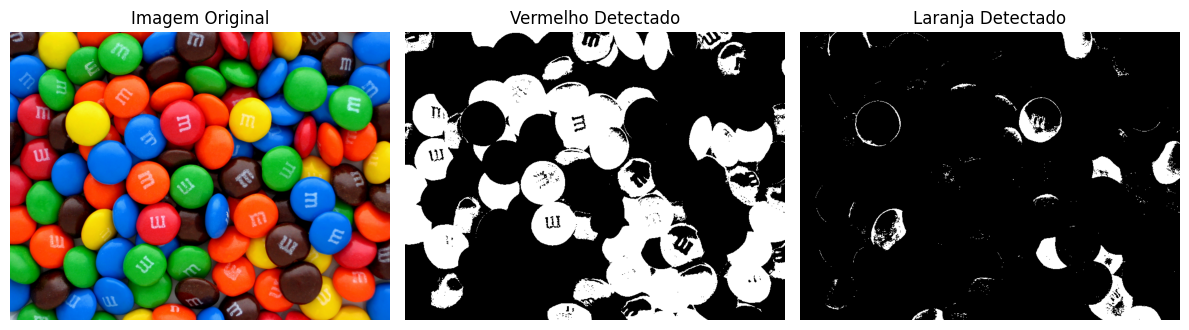

Sim! Tem M&M vermelho e laranja!


In [ ]:
tem_vermelho, tem_laranja = tem_vermelho_e_laranja("/content/imagens/Q6/MM.bmp", mostrar=True)

if tem_vermelho and tem_laranja:
    print("Sim! Tem M&M vermelho e laranja!")
else:
    print("Não encontrei M&M vermelho e laranja nessa imagem")

#Aplicação do método de binarização

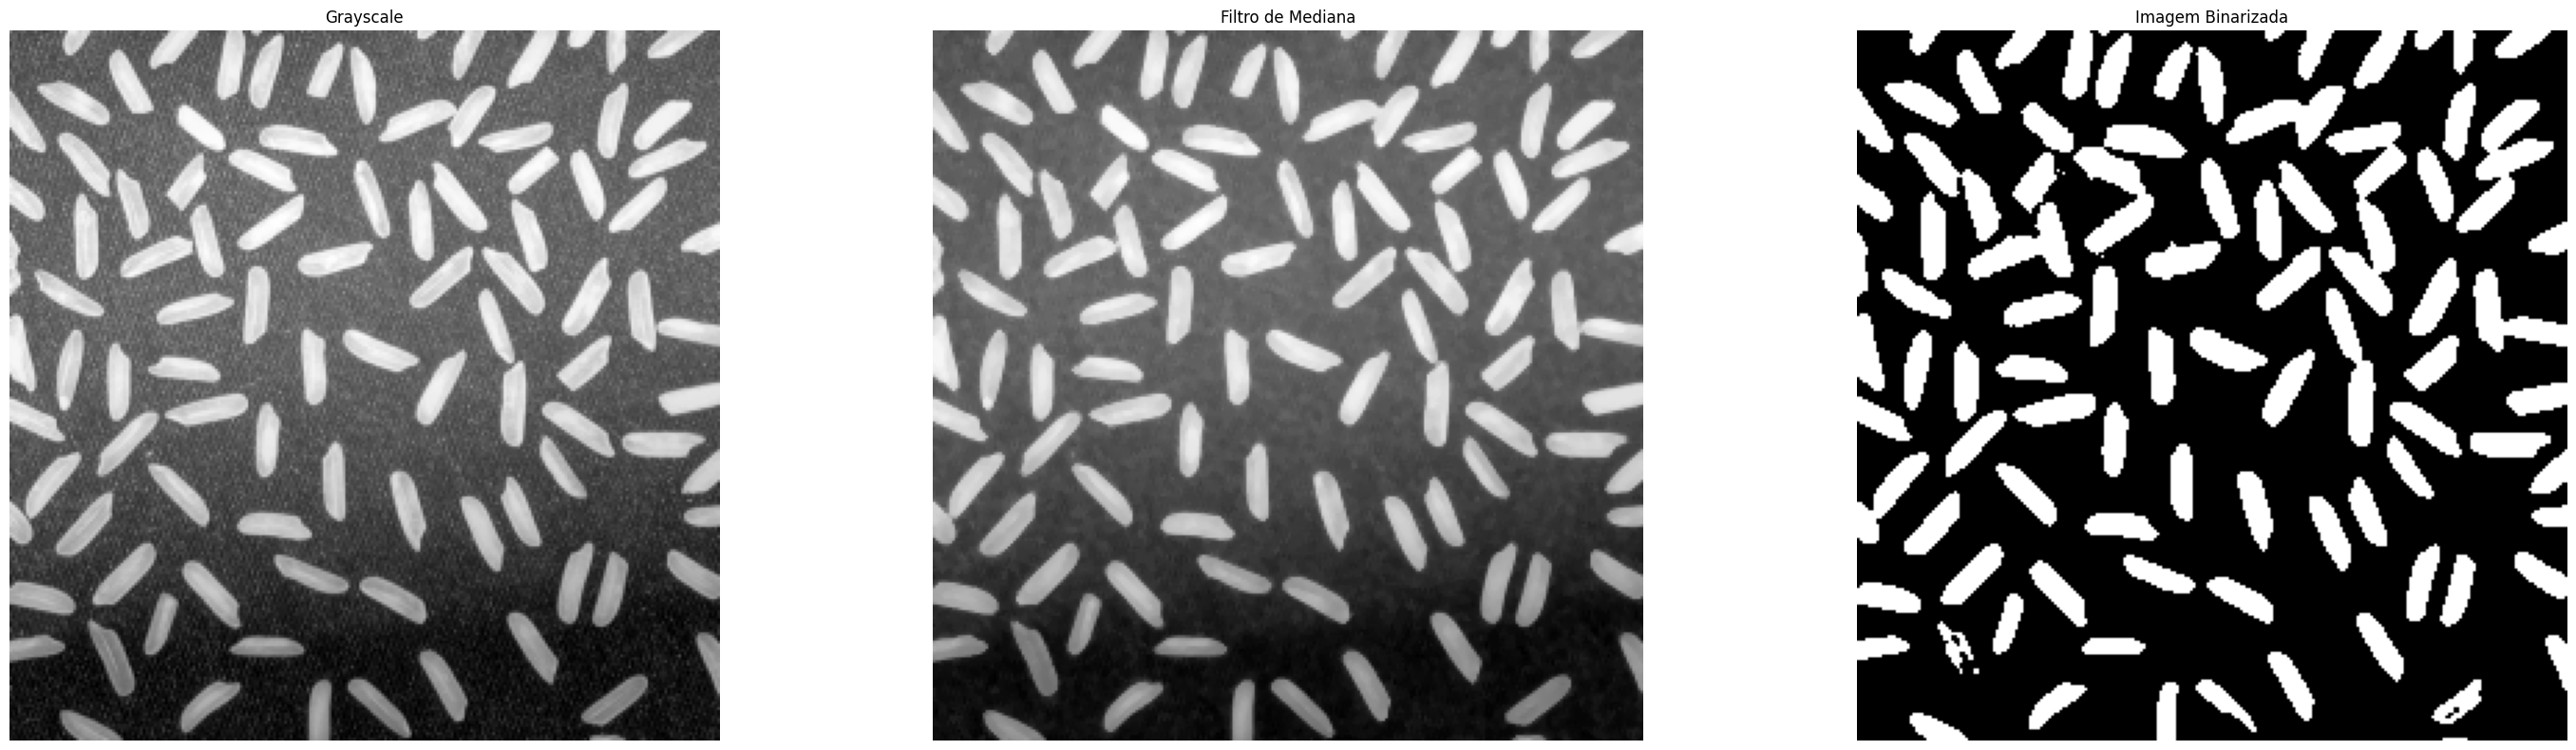

In [ ]:
# Carrega a imagem em escala de cinza
img = cv2.imread("/content/imagens/Q7/rice.bmp", cv2.IMREAD_GRAYSCALE)

# Aplica filtro de mediana (ex: 3x3) para amenizar ruídos
img_median = cv2.medianBlur(img, 3)

# Aplica limiarização (thresholding) simples
_, binarizada = cv2.threshold(img_median, 120, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(30, 8))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_median, cmap='gray')
plt.title("Filtro de Mediana")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binarizada, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis("off")

plt.tight_layout()
plt.show()


#Limpando imagens com ruidos sal e pimenta

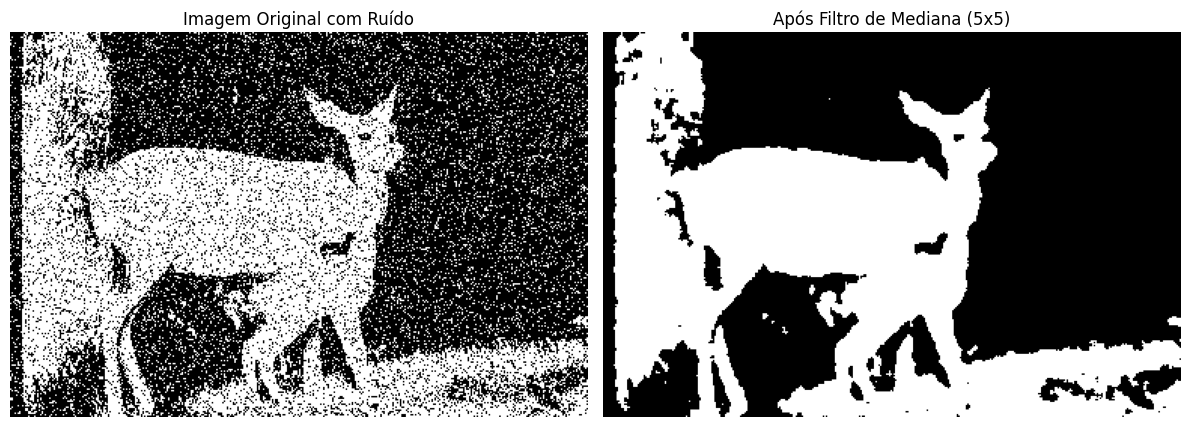

In [ ]:
img1 = cv2.imread("/content/imagens/Q8/Binary_Noise.bmp")

# Aplica filtro de mediana (ex: 3x3) para amenizar ruídos
img1_median = cv2.medianBlur(img1, 5)

# Plota as imagens
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img1_median)
plt.title("Após Filtro de Mediana (5x5)")
plt.axis("off")

plt.tight_layout()
plt.show()

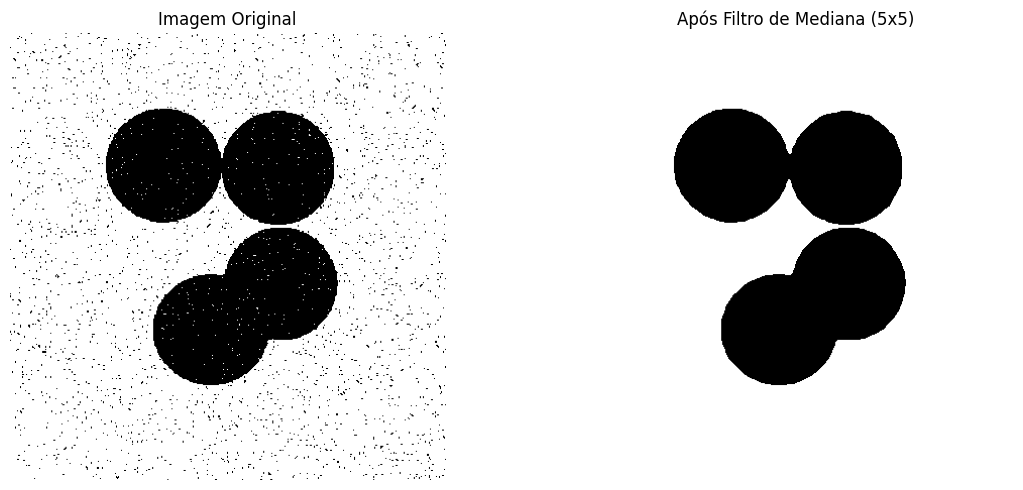

In [ ]:
img2 = cv2.imread("/content/imagens/Q8/Circles_Noise.bmp")

# Aplica filtro de mediana (ex: 3x3) para amenizar ruídos
img2_median = cv2.medianBlur(img2, 5)

# Plota as imagens
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2_median)
plt.title("Após Filtro de Mediana (5x5)")
plt.axis("off")

plt.tight_layout()
plt.show()